<a href="https://colab.research.google.com/github/Brunchcode/Banking-Marketing-Targets-Prediction/blob/main/Banking_Marketing_Targets_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banking-Marketing-Targets-Prediction

In [1]:
#import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(
    style='ticks',
    context='talk',
    font_scale=0.8,
    rc={'figure.figsize': (8,6)}
)

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/Brunchcode/Banking-Marketing-Targets-Prediction/main/train.csv', sep = ';')
print(train_data.shape)
train_data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
test_data = pd.read_csv('https://raw.githubusercontent.com/Brunchcode/Banking-Marketing-Targets-Prediction/main/test.csv', sep = ';')
print(test_data.shape)
test_data.head()


(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Analysis/EDA of the data set

In [5]:

# Display basic information about the dataset
print(train_data.info())

# Display summary statistics
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campaign  \
count  45211.0

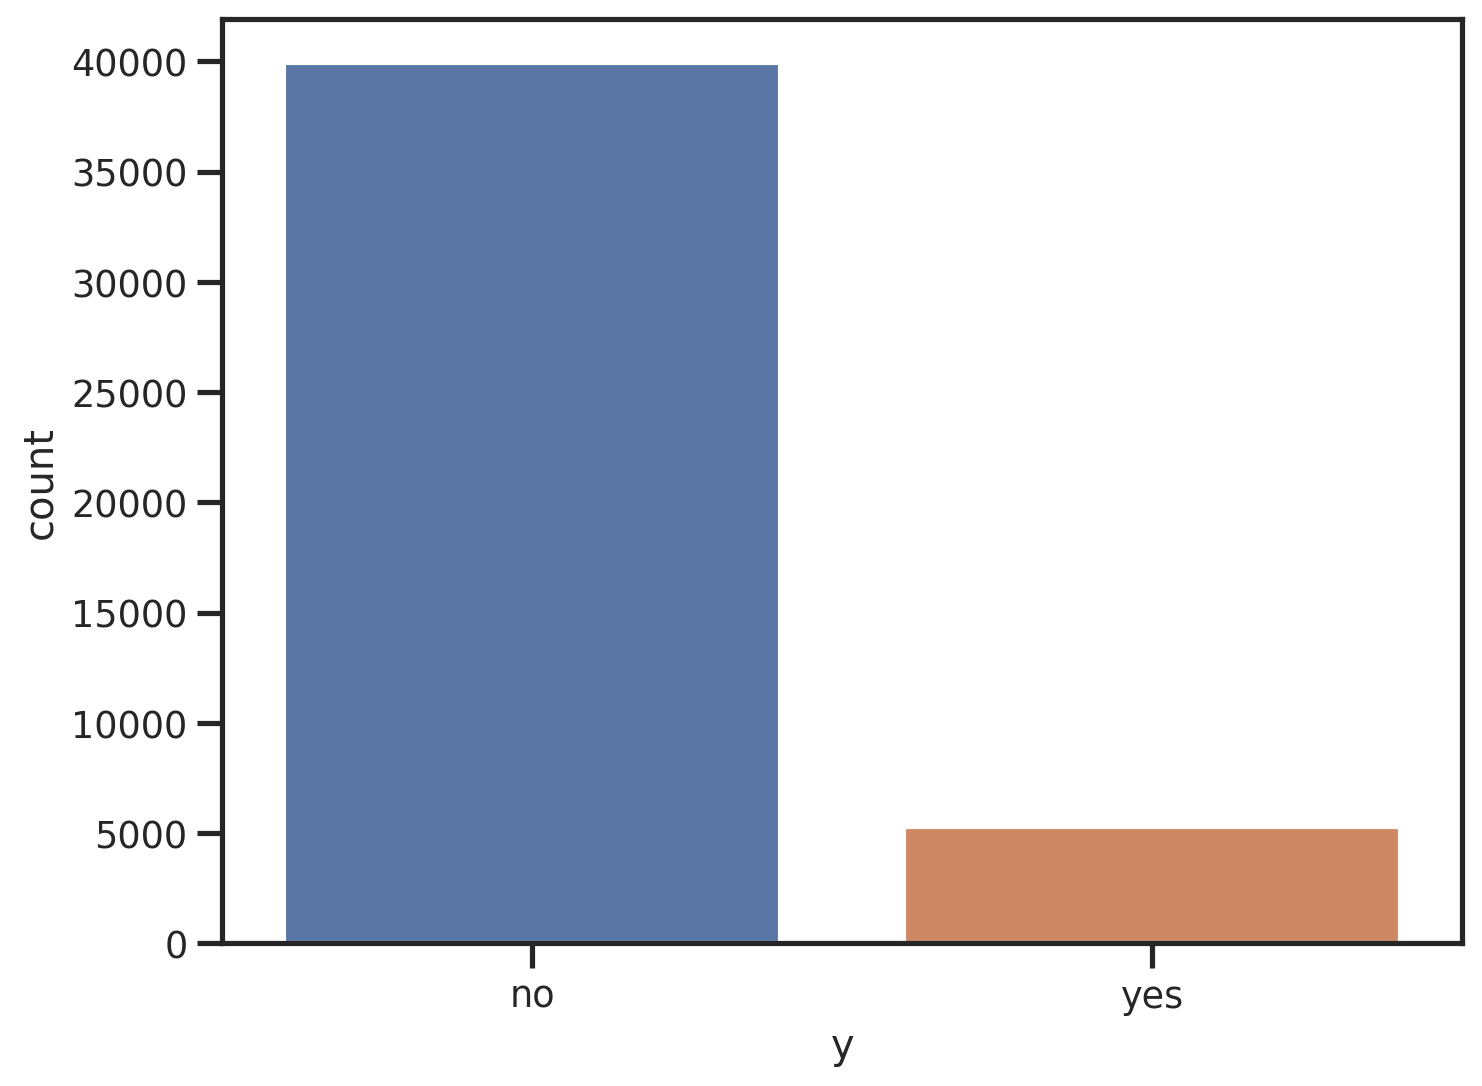

In [6]:
# Visualize the distribution of the target variable
sns.countplot(x='y', data=train_data)
plt.show()

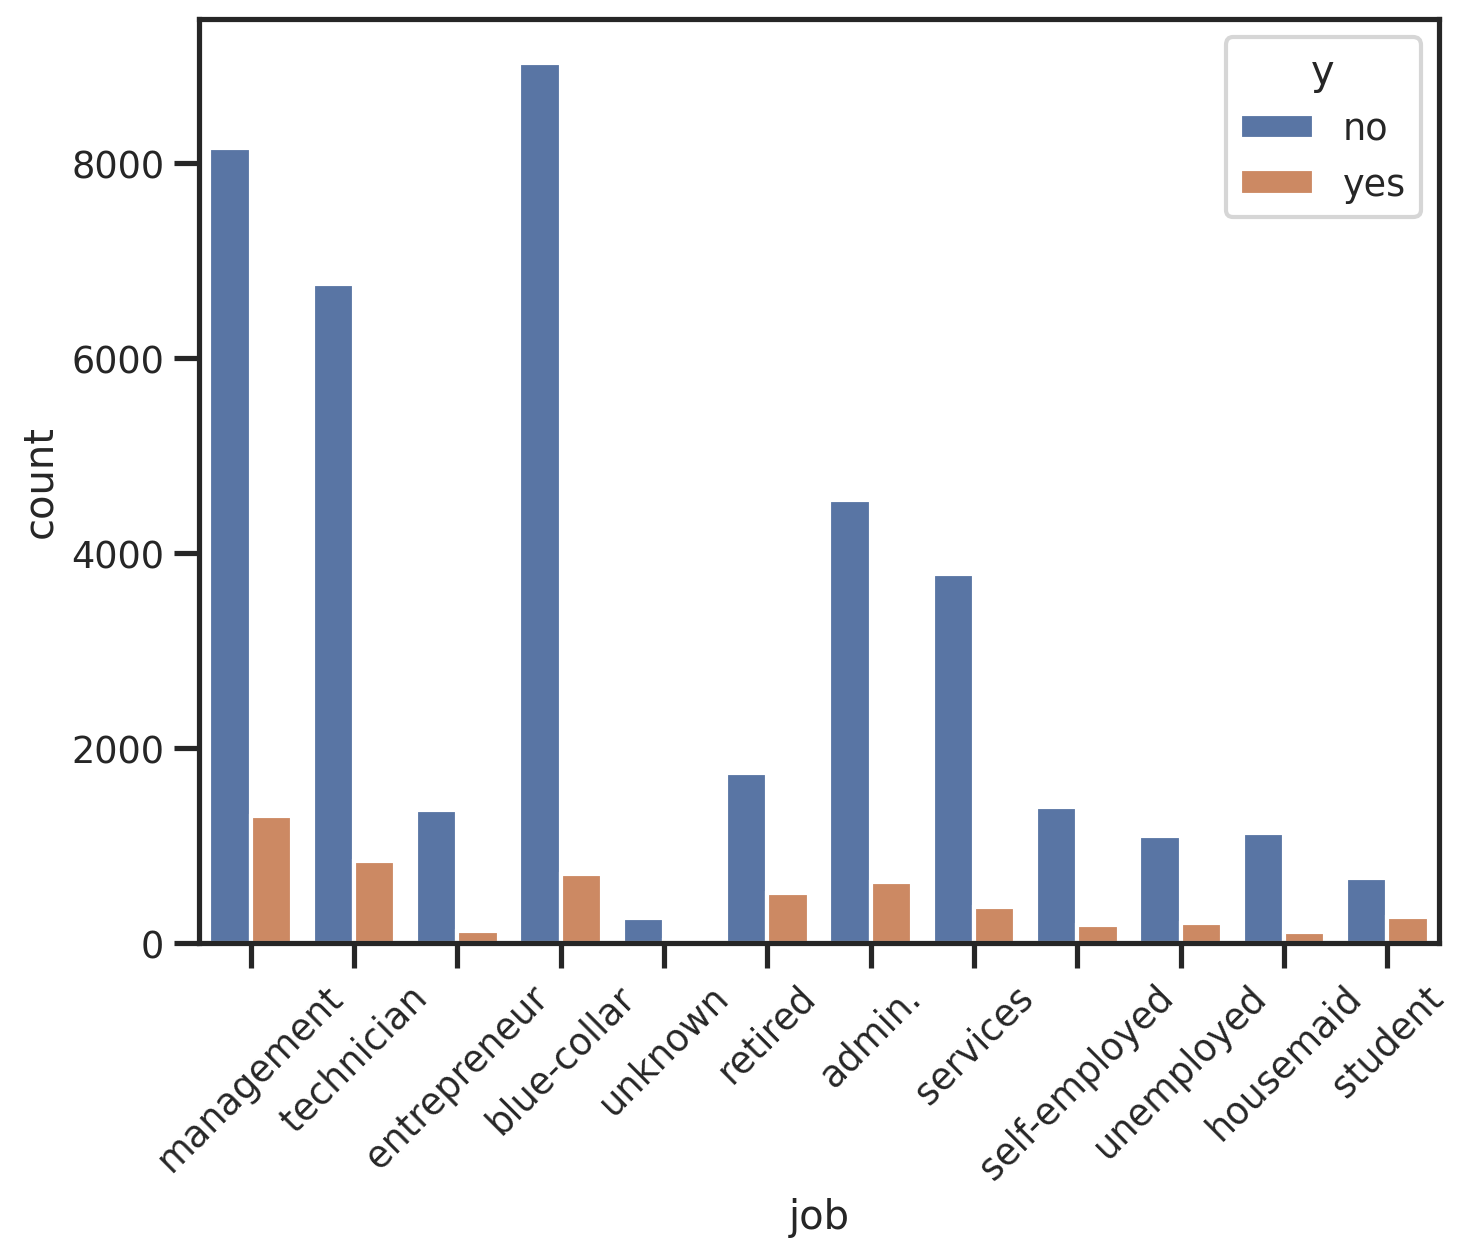

In [7]:
# Visualize the distribution of some categorical features
sns.countplot(x='job', data=train_data, hue='y')
plt.xticks(rotation=45)
plt.show()

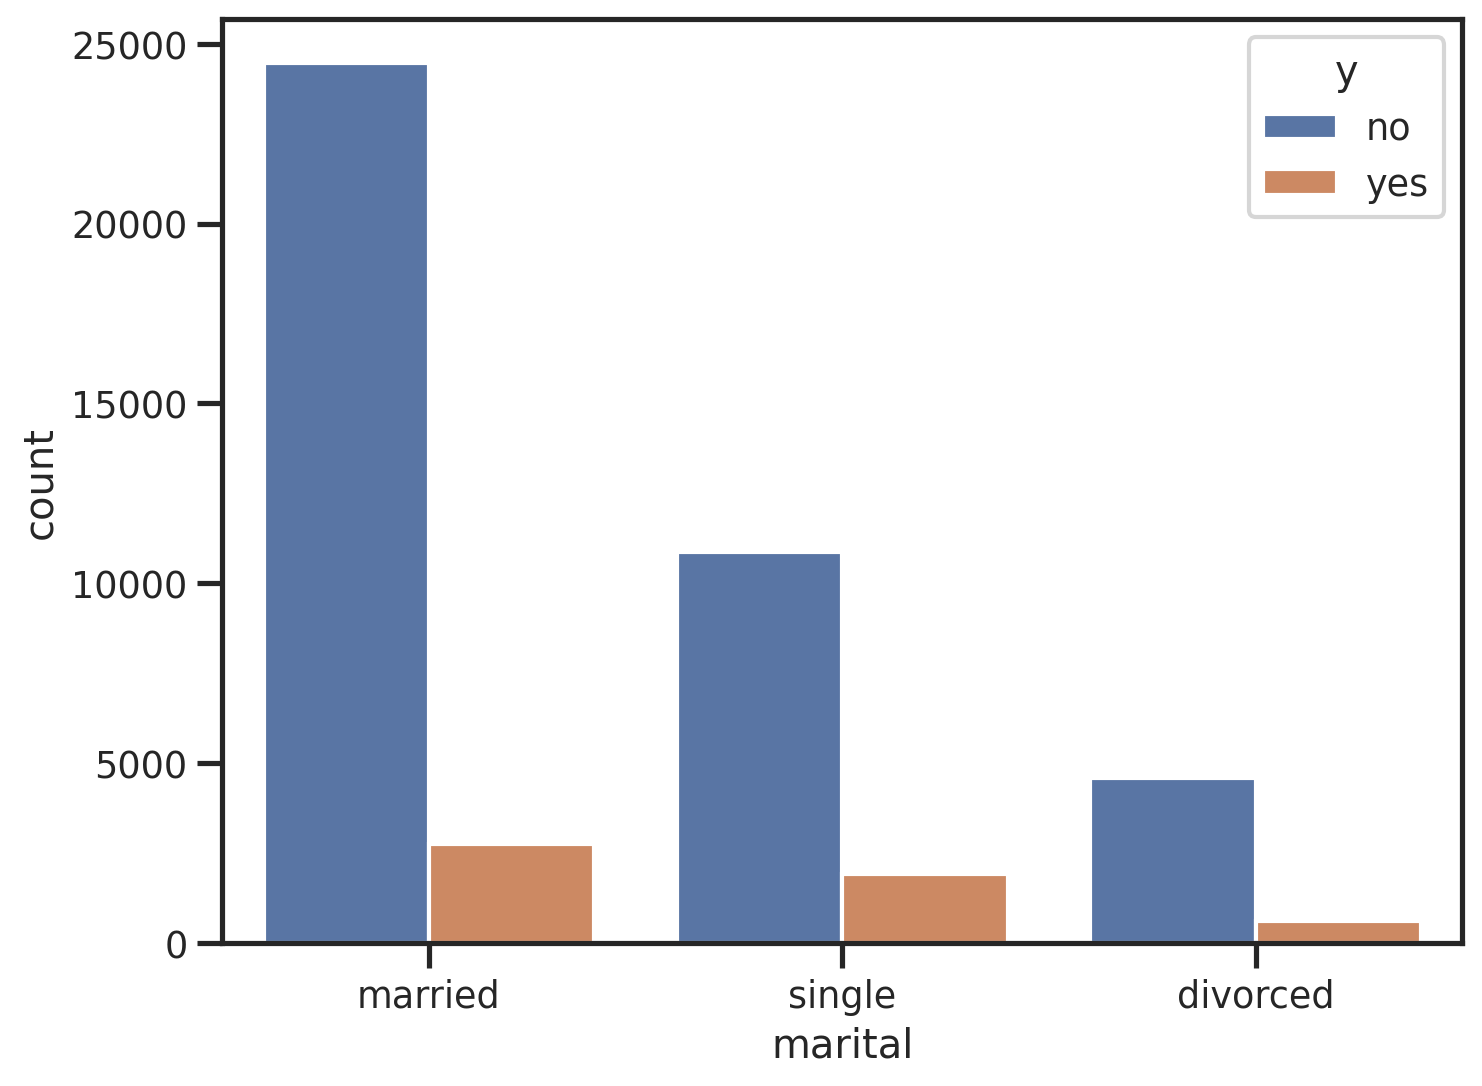

In [8]:
sns.countplot(x='marital', data=train_data, hue='y')
plt.show()

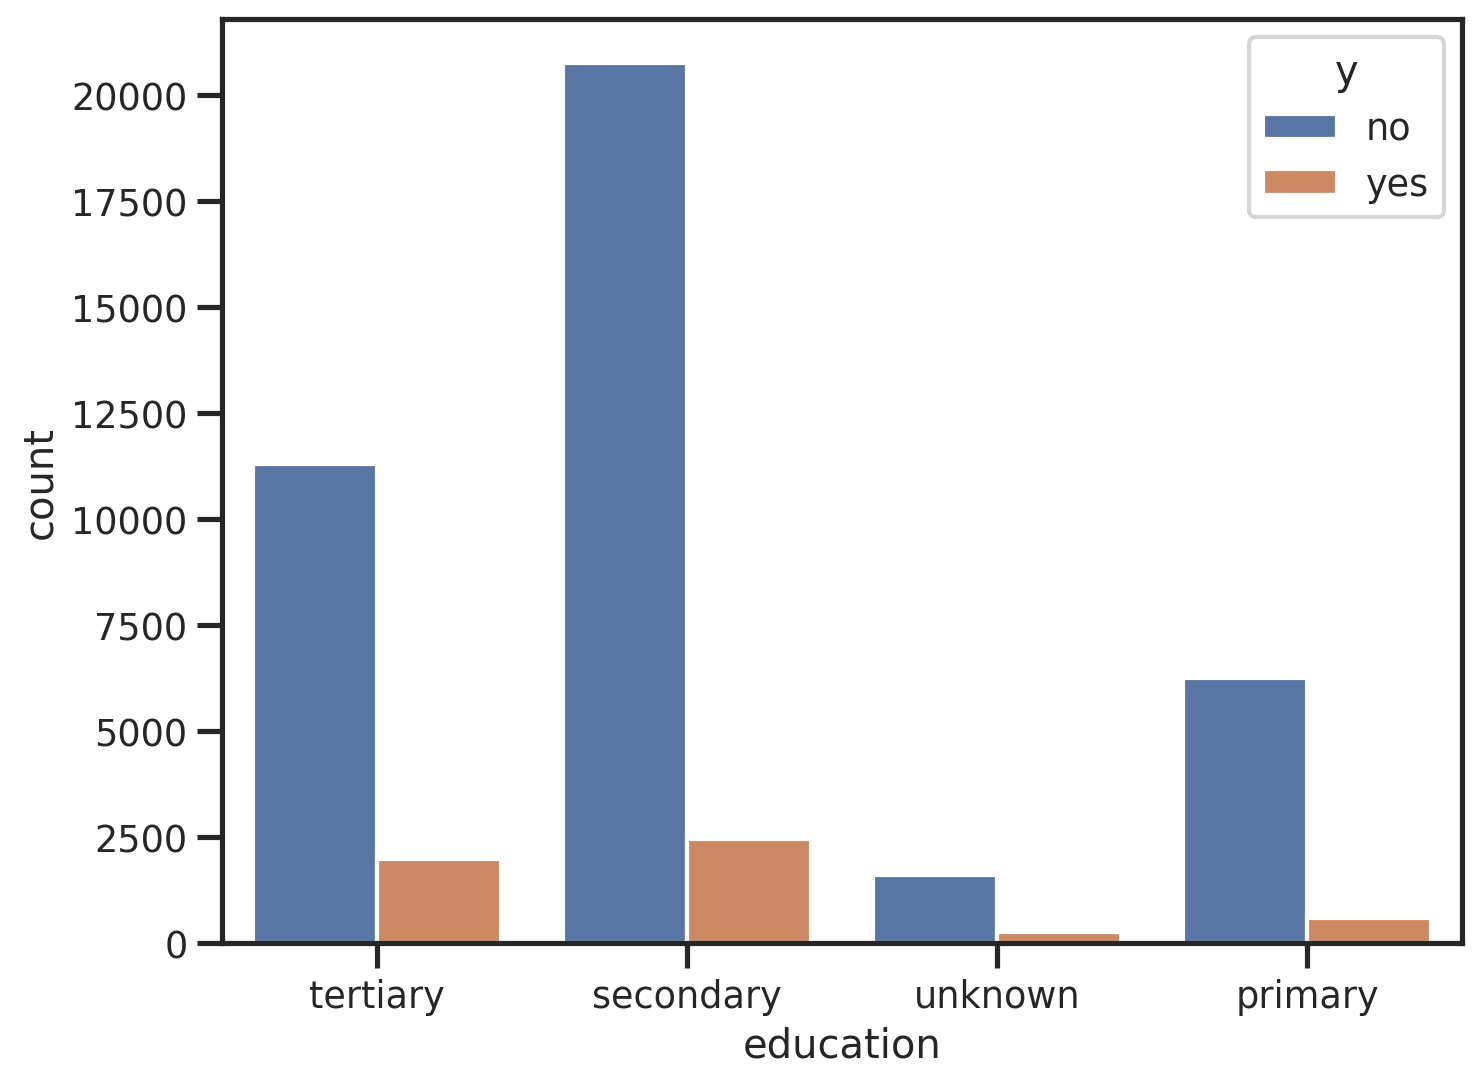

In [9]:
sns.countplot(x='education', data=train_data, hue='y')
plt.show()

## Feature engineering and Pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = train_data.drop('y', axis=1)
y = train_data['y']

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to the preprocessor
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Perform a classification prediction using multiple models

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate the Random Forest model
clf_rf = clf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Train and evaluate the Logistic Regression model
clf_lr = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression())])
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Train and evaluate the Support Vector Machine (SVM) model
clf_svm = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Random Forest Classifier:
Accuracy: 0.9027977441114674
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7952
         yes       0.66      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:
Accuracy: 0.8988167643481145
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.94      7952
         yes       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043


Support Vector Machine:
Accuracy: 0.9026871613402632
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7952
         yes       0.69      0.36      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043



Random Forest Classifier:
Accuracy: 0.9027977441114674
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7952
         yes       0.66      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043



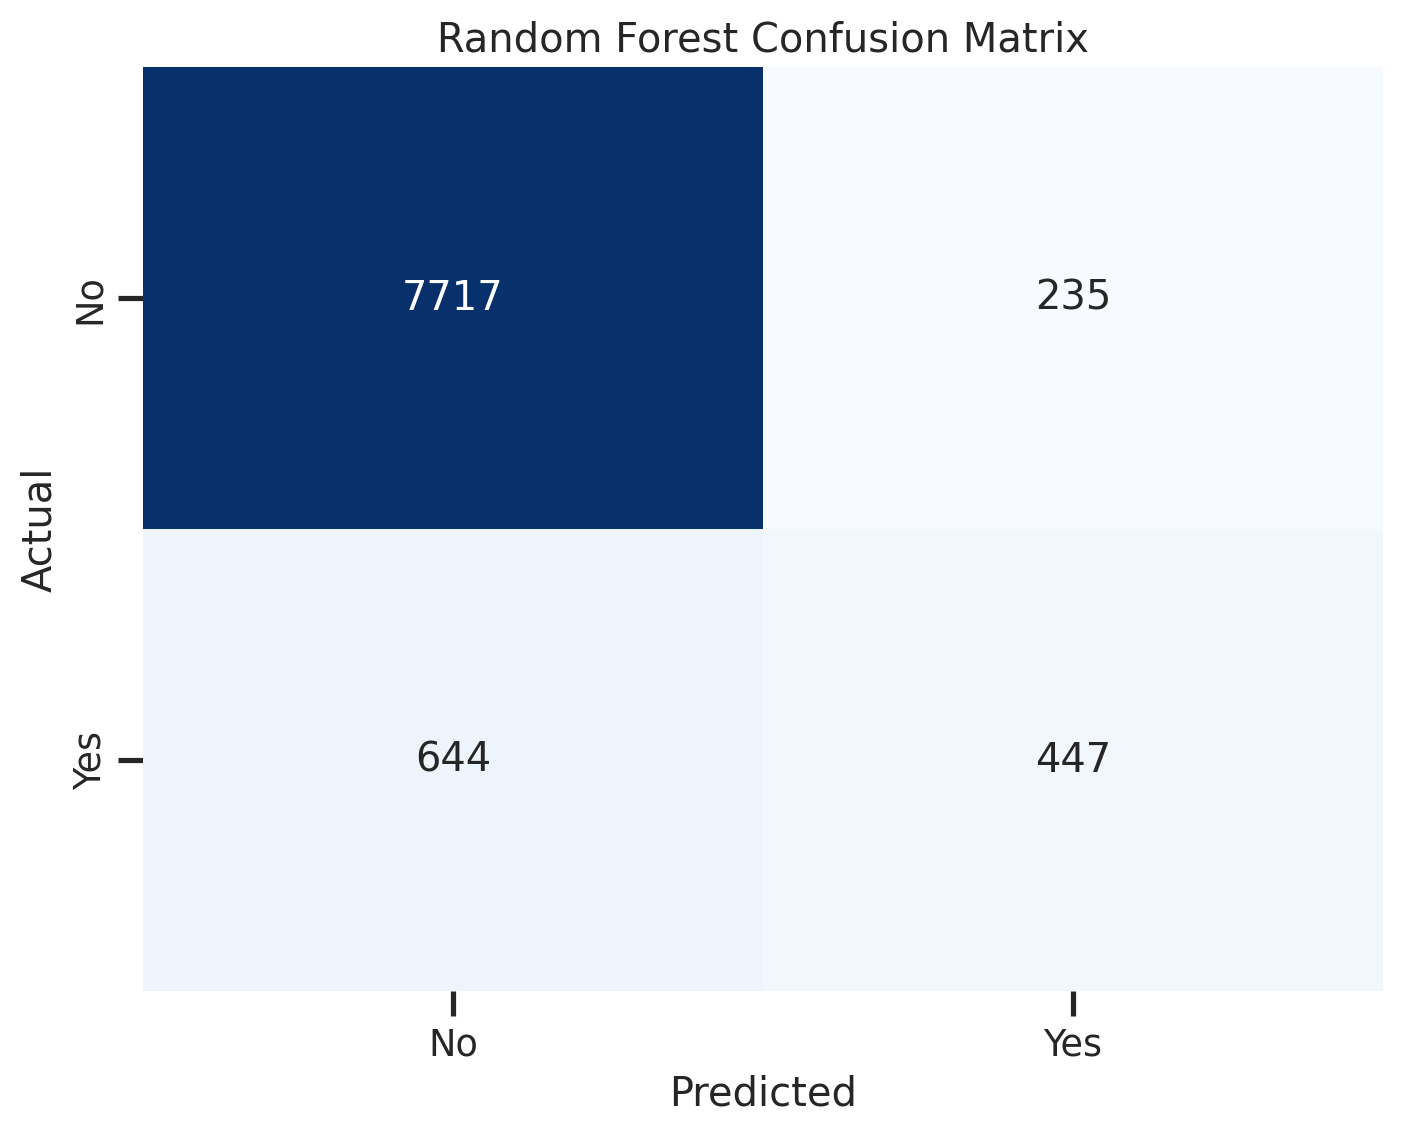

ValueError: ignored

In [12]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Random Forest
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, title='Random Forest Confusion Matrix')
plot_roc_curve(y_test, clf_rf.predict_proba(X_test)[:, 1], title='Random Forest ROC Curve')

# Logistic Regression
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, title='Logistic Regression Confusion Matrix')
plot_roc_curve(y_test, clf_lr.predict_proba(X_test)[:, 1], title='Logistic Regression ROC Curve')

# Support Vector Machine
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm, title='Support Vector Machine Confusion Matrix')
plot_roc_curve(y_test, clf_svm.decision_function(X_test), title='Support Vector Machine ROC Curve')


Random Forest Classifier:
Accuracy: 0.9027977441114674
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7952
         yes       0.66      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043



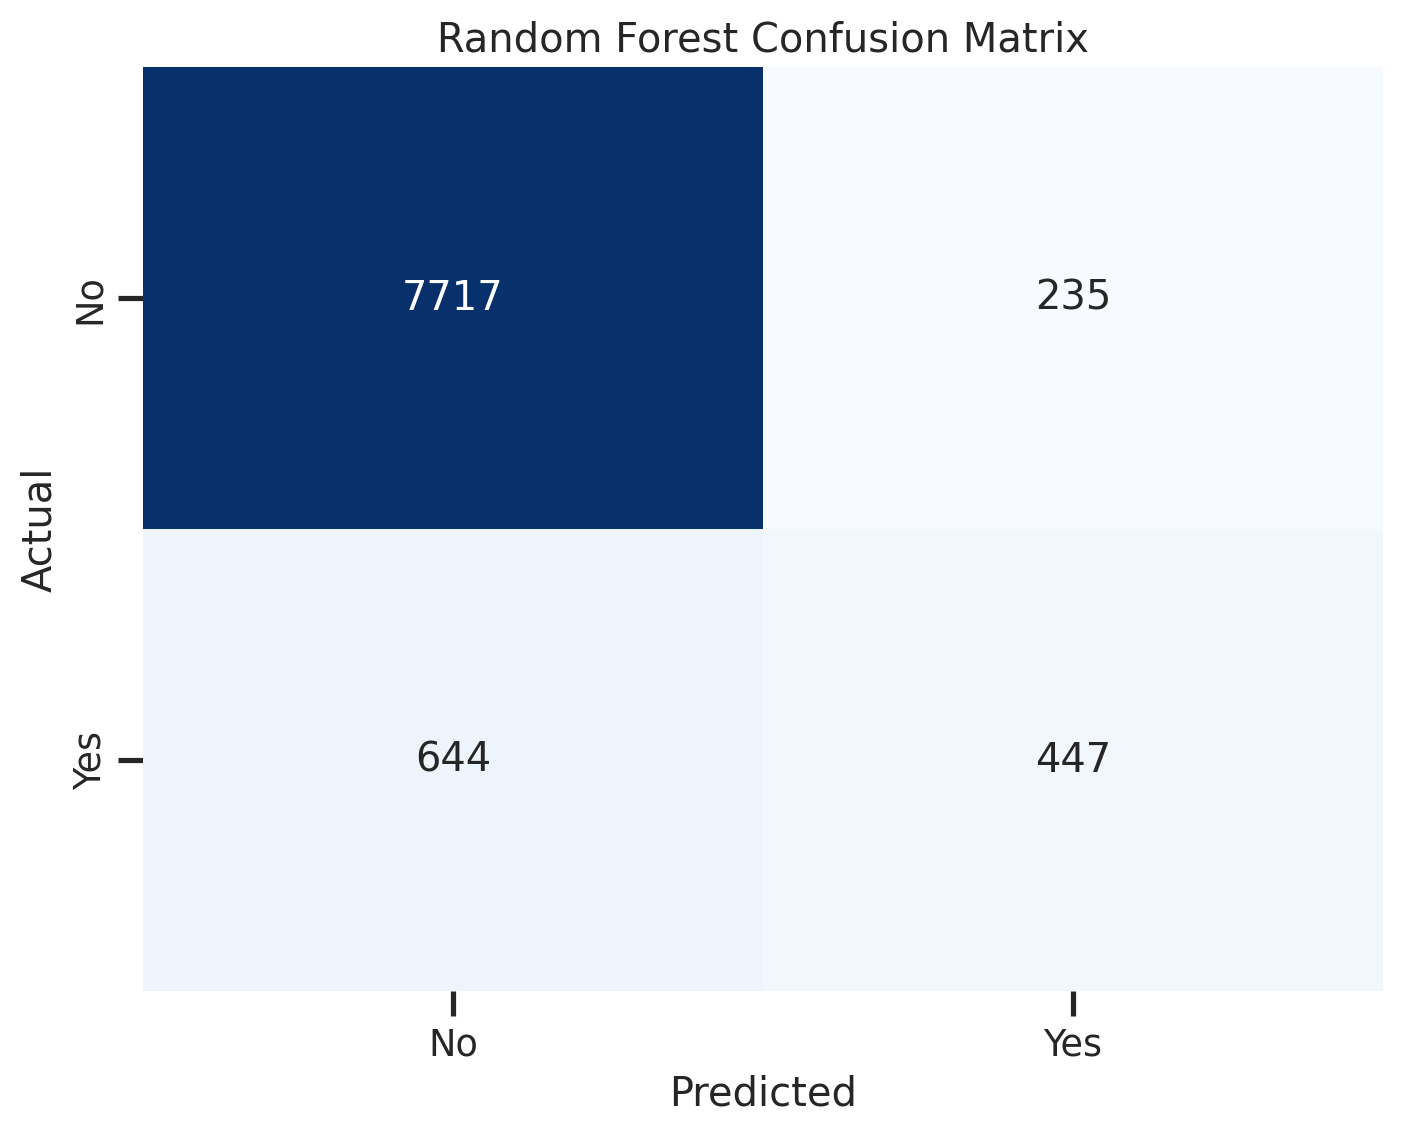

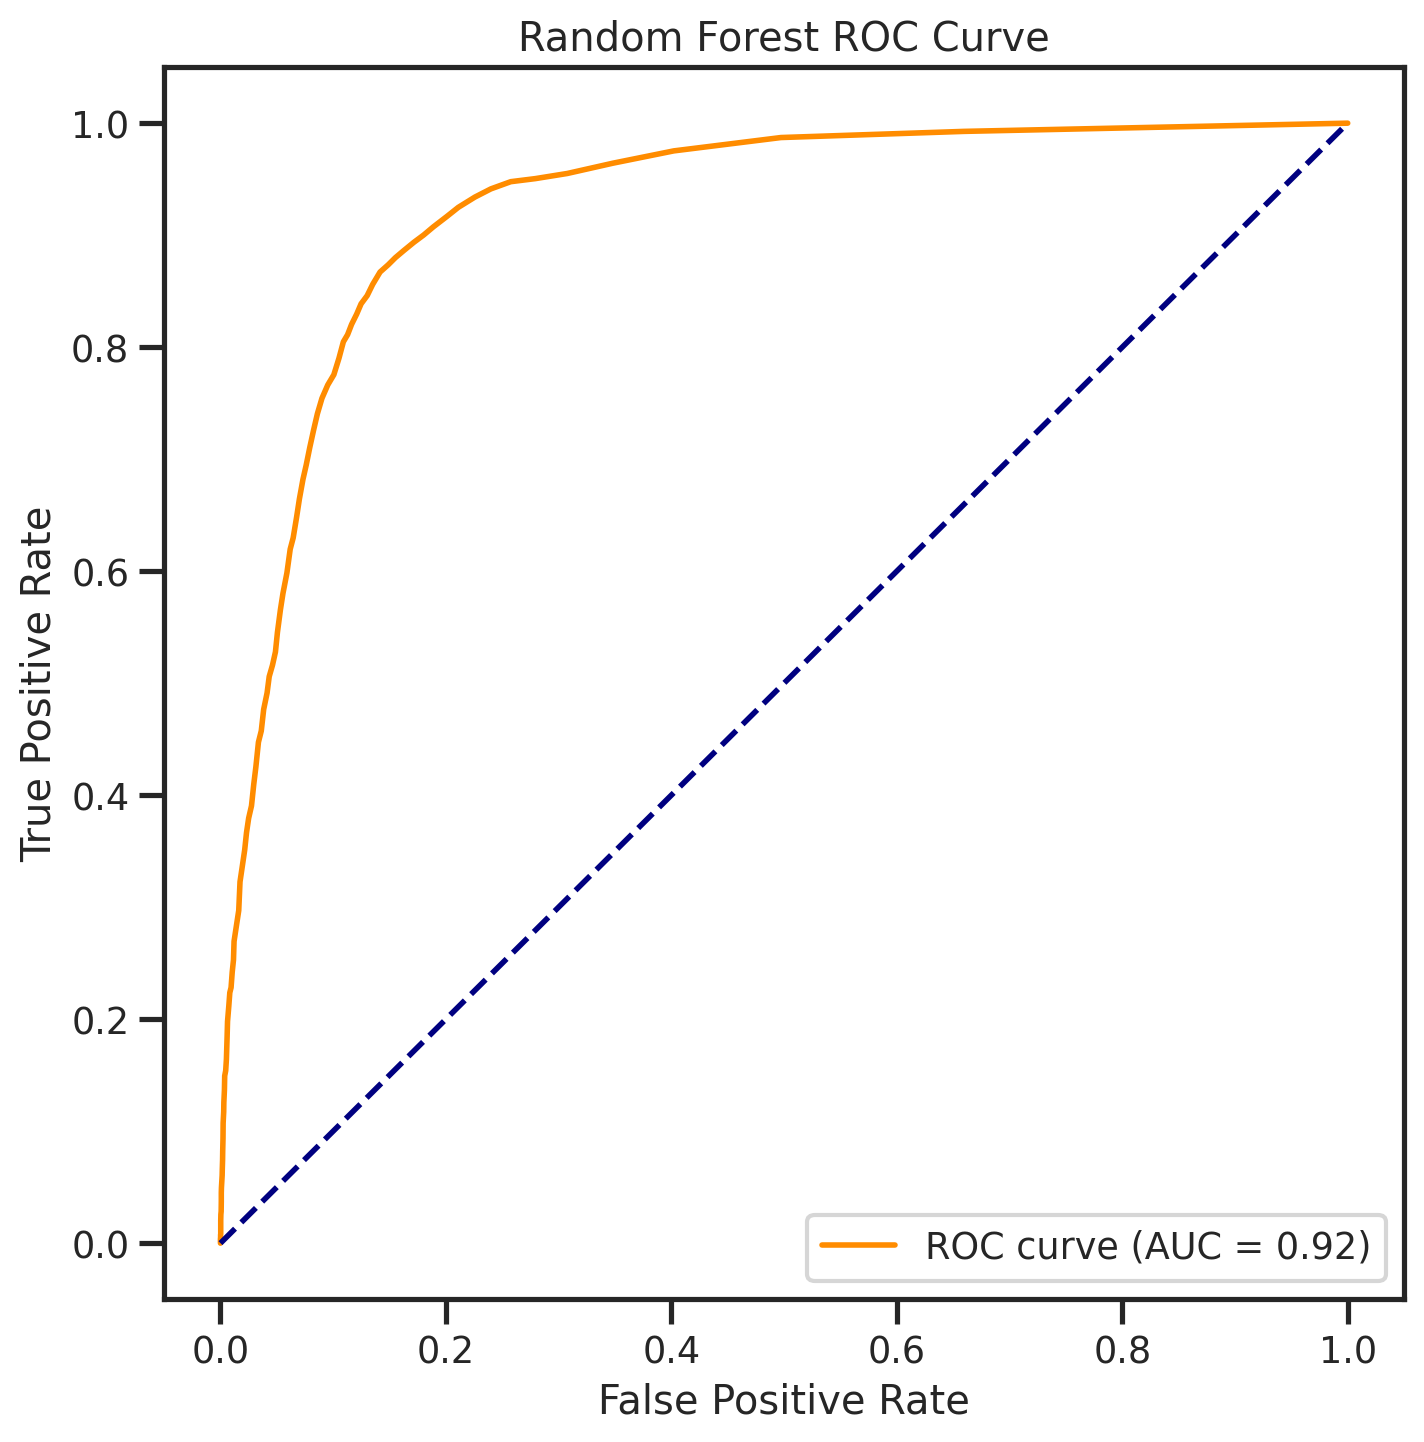


Logistic Regression:
Accuracy: 0.8988167643481145
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.94      7952
         yes       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



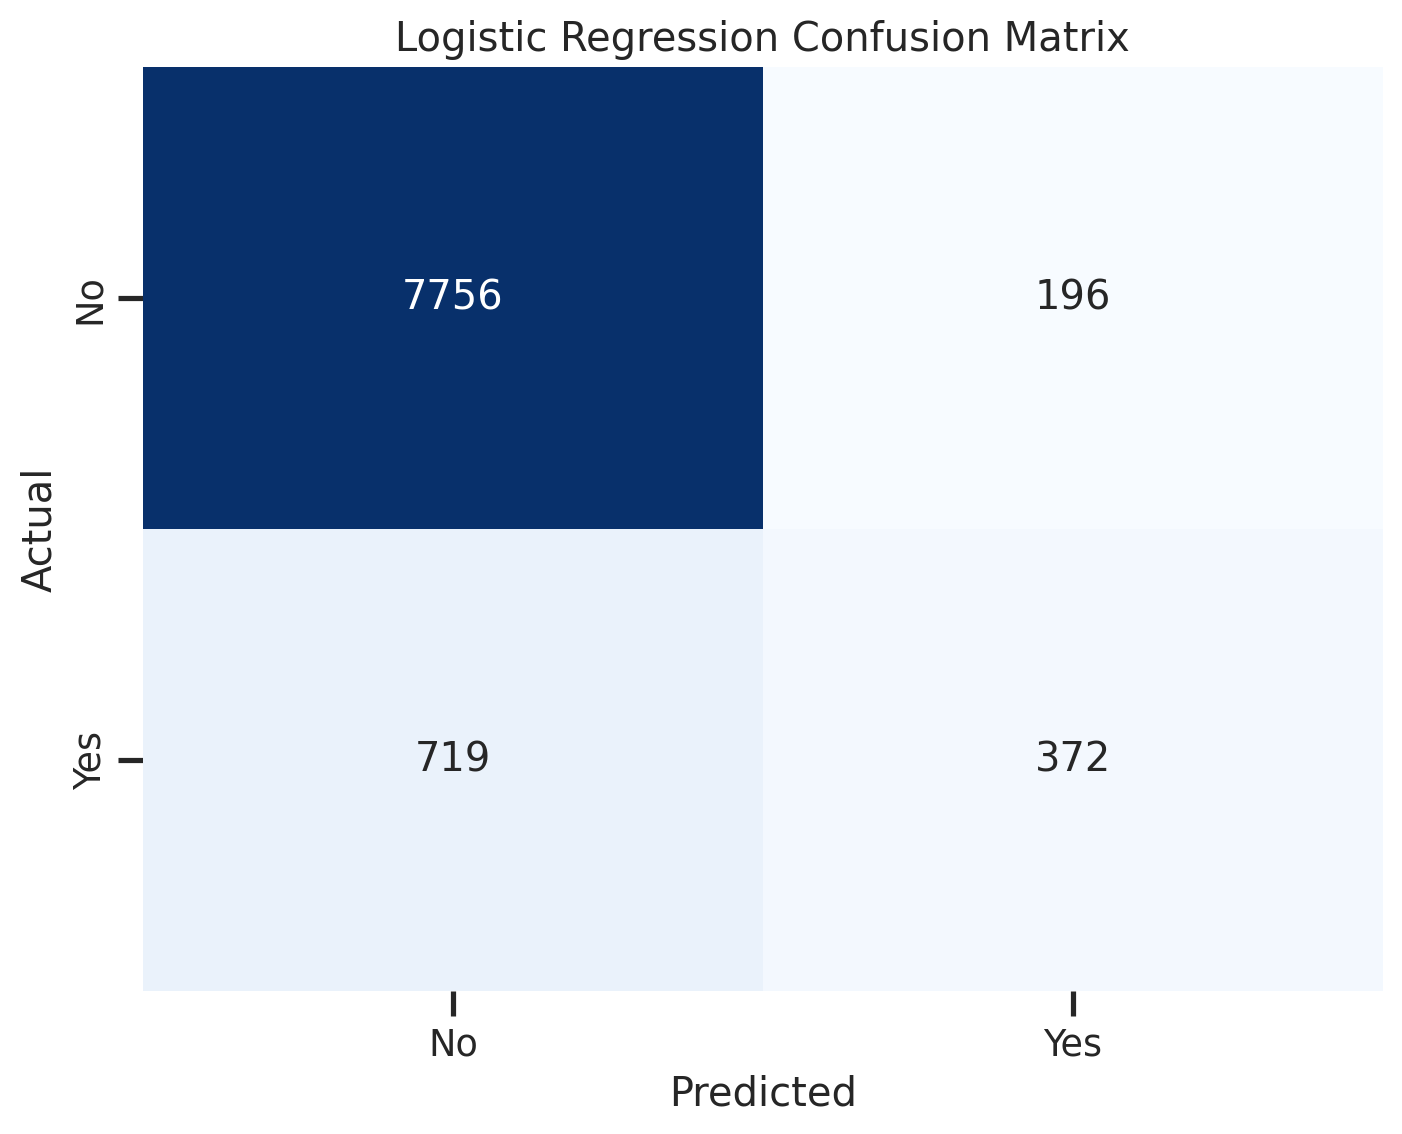

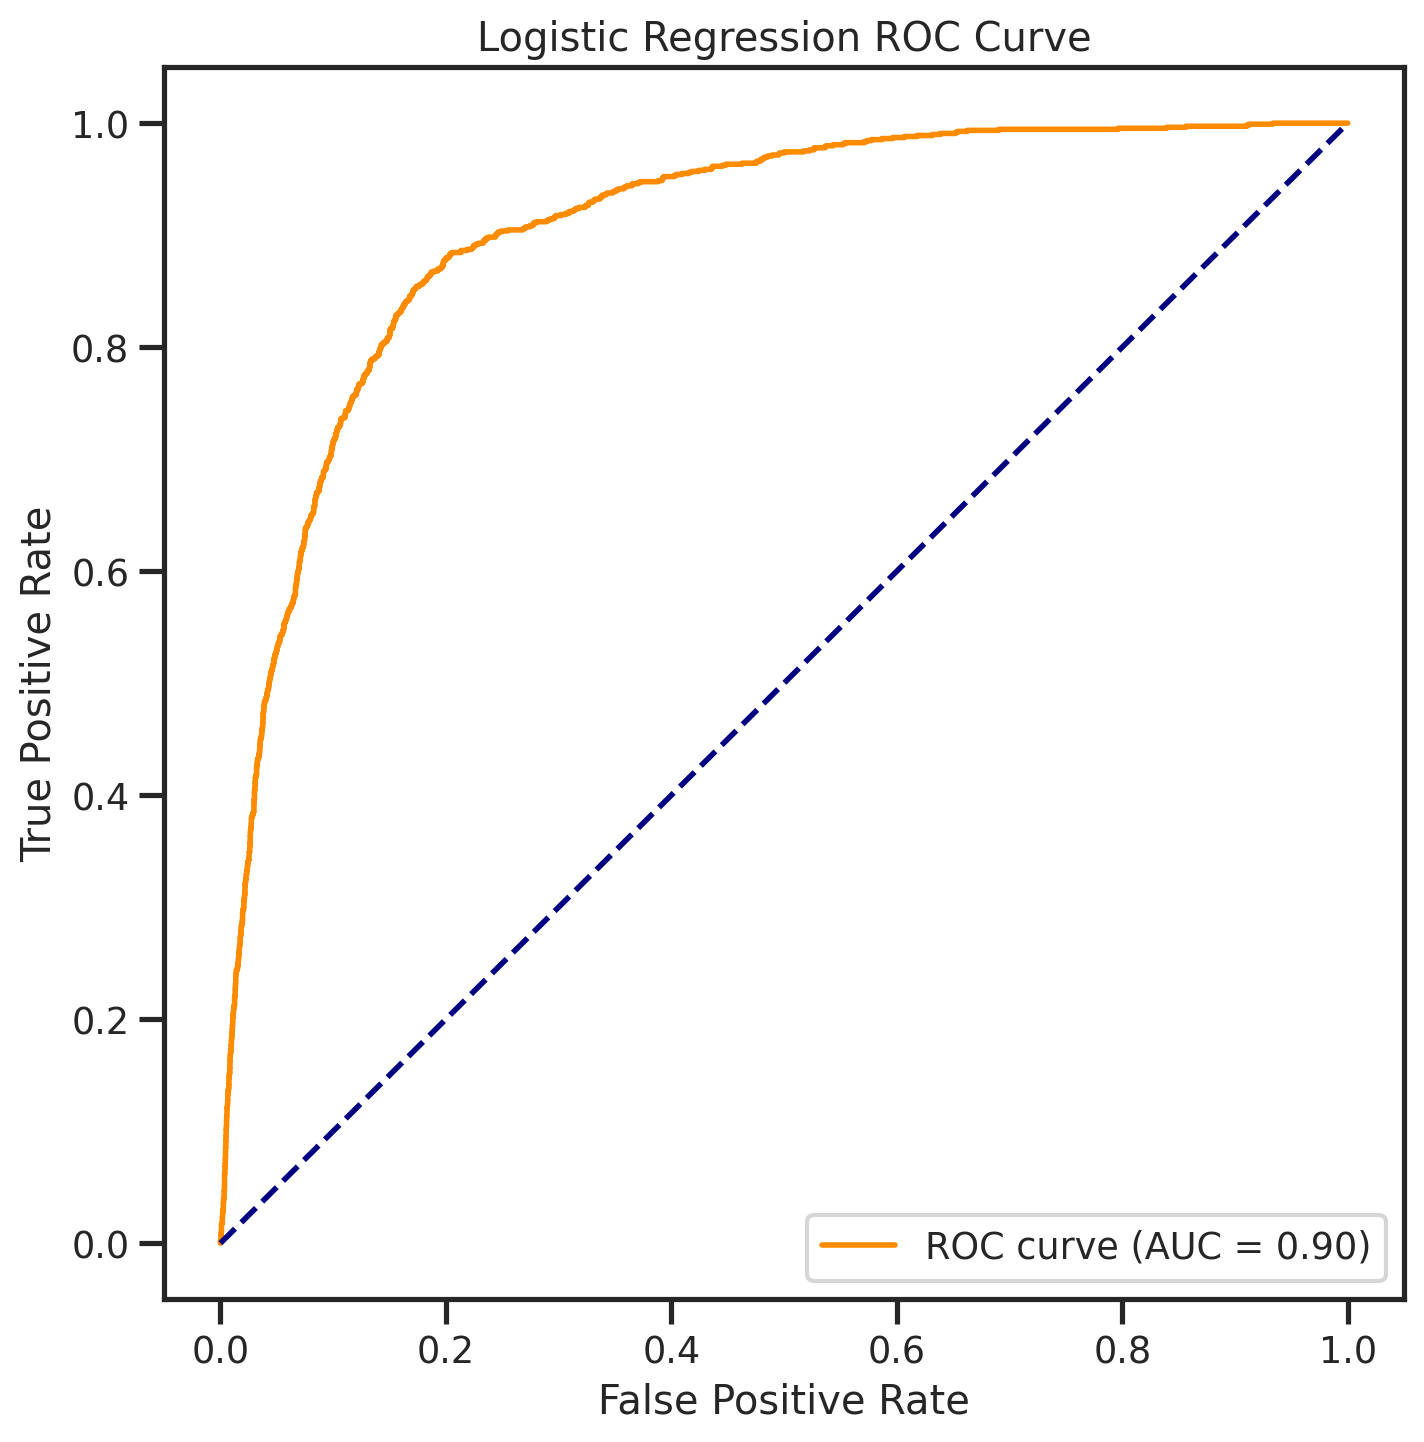


Support Vector Machine:
Accuracy: 0.9026871613402632
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7952
         yes       0.69      0.36      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043



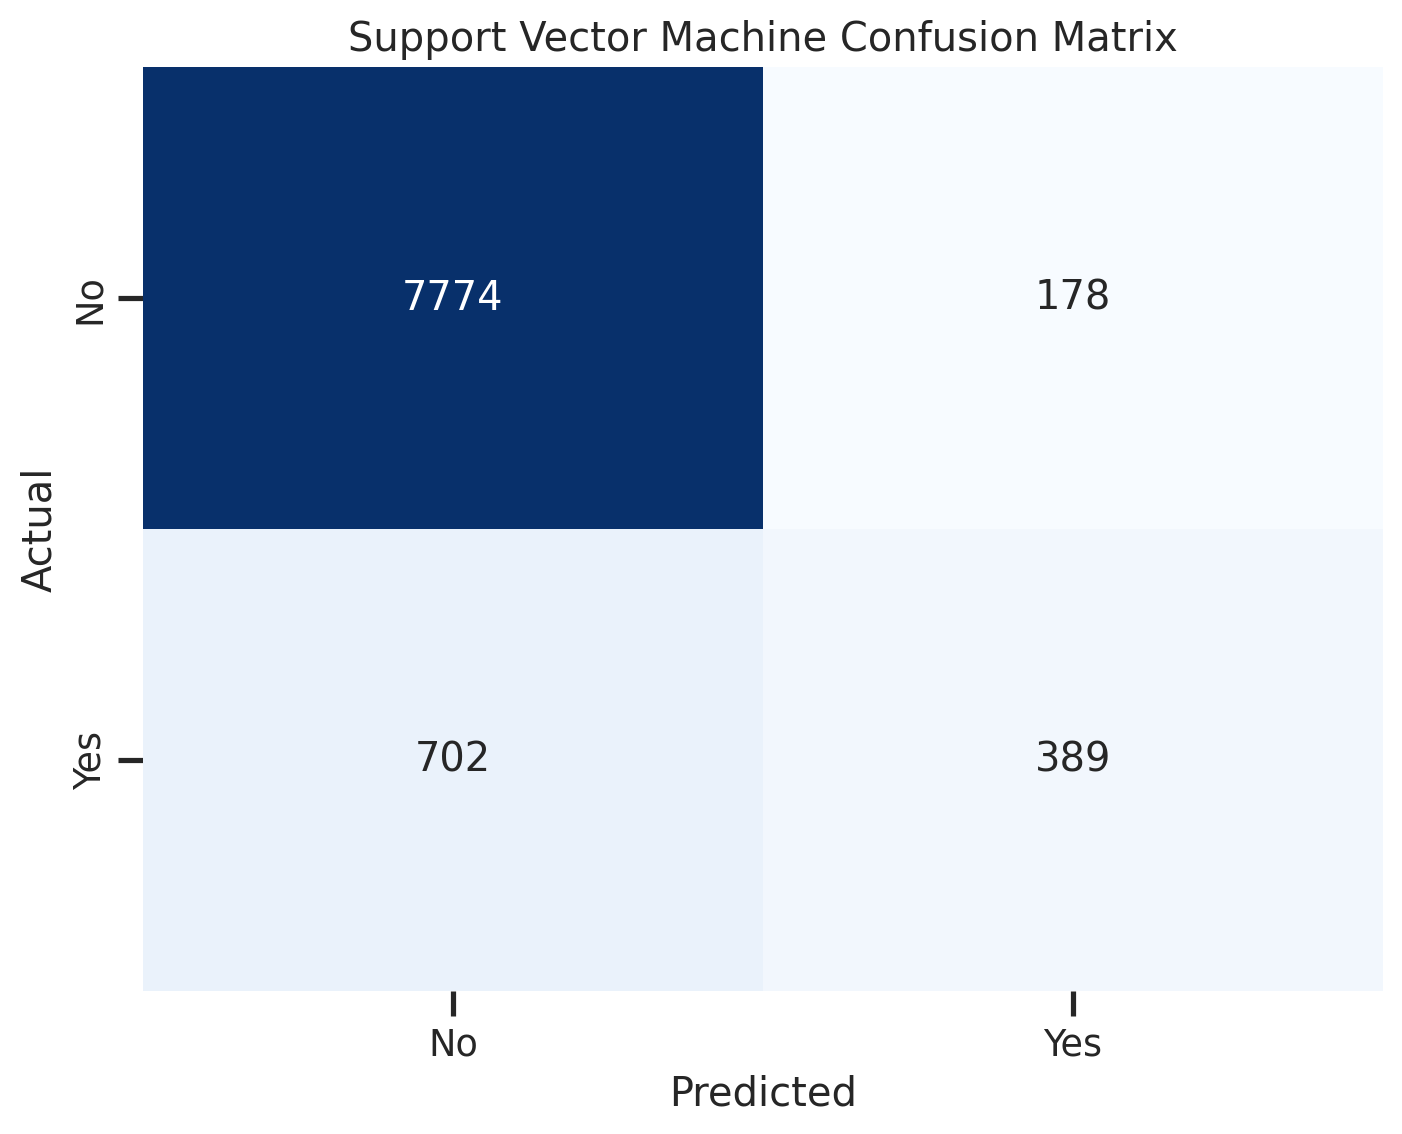

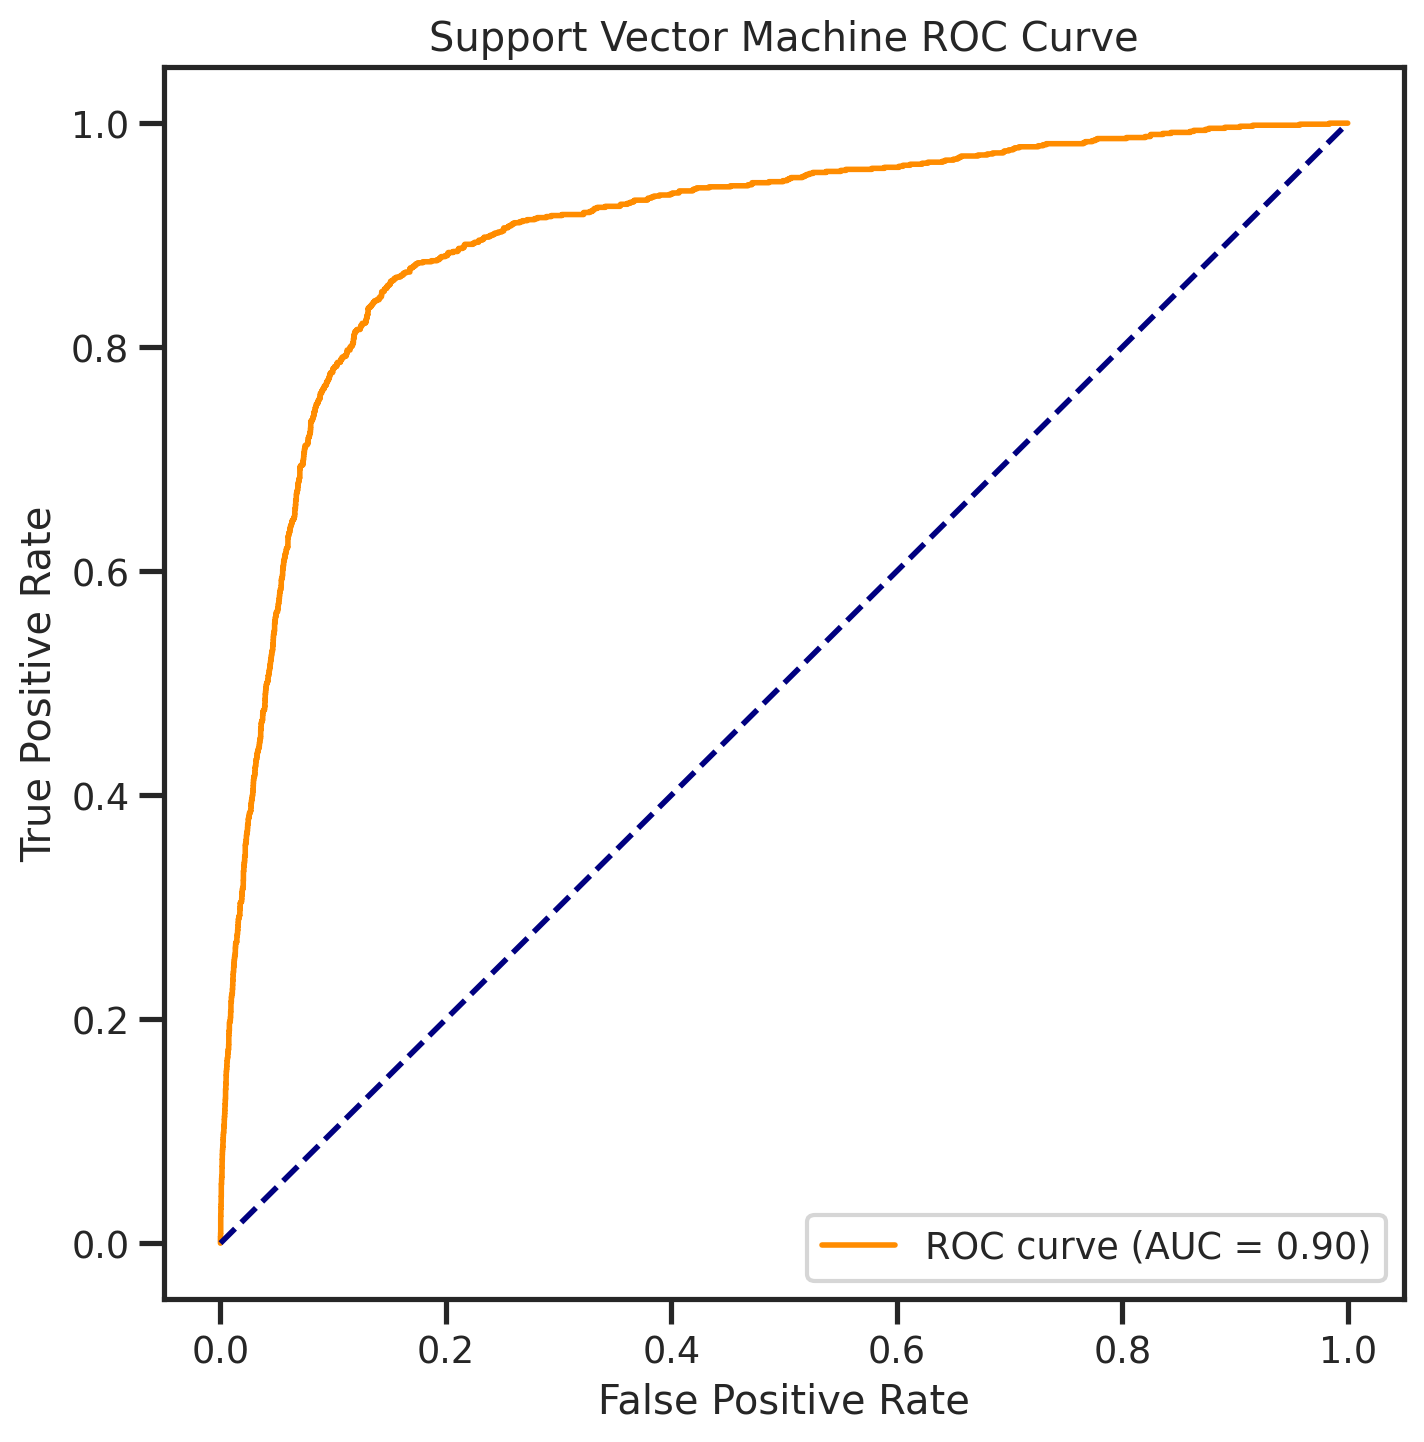

In [13]:
# Convert 'yes' and 'no' to 1 and 0 in the target variable
y_test_binary = y_test.map({'yes': 1, 'no': 0})

# Random Forest
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, title='Random Forest Confusion Matrix')
plot_roc_curve(y_test_binary, clf_rf.predict_proba(X_test)[:, 1], title='Random Forest ROC Curve')


# Logistic Regression
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, title='Logistic Regression Confusion Matrix')
plot_roc_curve(y_test_binary, clf_lr.predict_proba(X_test)[:, 1], title='Logistic Regression ROC Curve')

# Support Vector Machine
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm, title='Support Vector Machine Confusion Matrix')
plot_roc_curve(y_test_binary, clf_svm.decision_function(X_test), title='Support Vector Machine ROC Curve')

